<a href="https://colab.research.google.com/github/niyaudinoor/HackathonNAAN/blob/main/Turbidity_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import graphviz
from IPython.display import display, HTML

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split

# Scikit-learn: Regression models
from sklearn.ensemble import RandomForestRegressor

# Scikit-learn: Metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Scikit-learn: Tree visualization
from sklearn.tree import export_graphviz
from sklearn import tree

# 2. Loading the Data into a Pandas DataFrame

Code Block 2A

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 3. Load the CSV File

Code Block 3A

In [ ]:
# Define the path to the CSV file containing water quality data
csv_path = "/content/drive/MyDrive/6. Colab Notebooks/2. Water Quality/Conductance_Turbidity_Test - Sheet2.csv"

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(csv_path)

df.head()

,Date,Average Specific Conductance μS/cm,Average Turbidity FNU,Average Temperature C,Average pH,Average Dissolved Oxygen mg/l,Average Turbidity FNU + 1 day,Average Turbidity FNU + 1 week,Average Turbidity FNU + 4 weeks
0,2024-05-01,1185.3,39.7,19.8,8.3,9.9,43.1,36.0,47.1
1,2024-05-02,1007.0,43.1,20.0,8.3,9.8,41.4,34.8,43.9
2,2024-05-03,864.5,41.4,20.9,8.3,9.7,37.6,30.9,39.1
3,2024-05-04,831.7,37.6,19.7,8.1,8.7,33.8,25.2,39.3
4,2024-05-05,825.8,33.8,18.7,8.1,9.0,32.2,22.4,41.1


# 4. Preprocessing the Dataset

## 4.1 Separating the Dataset into Inputs and Target

Code Block 4A

In [ ]:
# Drop the 'Date' column and the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the input features DataFrame
inputs = df.drop(['Date', 'Average Turbidity FNU + 1 day','Average Turbidity FNU + 1 week','Average Turbidity FNU + 4 weeks'], axis='columns')

# Select the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the target DataFrame
target = df[['Average Turbidity FNU + 1 day','Average Turbidity FNU + 1 week','Average Turbidity FNU + 4 weeks']]

Code Block 4B

In [ ]:
# Convert the inputs DataFrame to a NumPy array with float data type
inputs = np.array(inputs, dtype=float)

# Convert the target DataFrame to a NumPy array with float data type
target = np.array(target, dtype=float)

## 4.2 Splitting the Training and Testing Data

Code Block 4C

In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (73, 5)
X_test shape: (19, 5)
y_train shape: (73, 3)
y_test shape: (19, 3)


# 5. Training the Model


Code Block 5A

In [ ]:
# Initialize a RandomForestRegressor model from the scikit-learn library
model = RandomForestRegressor()

Code Block 5B

In [ ]:
# Fitting the model to the training data (X_train) and corresponding labels (y_train)
model.fit(X_train, y_train)

RandomForestRegressor()

Code Block 5C

In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 1)

# Printing the predicted labels
print(rounded_y_pred)

[[34.8 47.3 43.6]
 [21.9 40.5 39.9]
 [37.3 51.6 42.2]
 [73.4 42.9 35.1]
 [39.8 33.2 40.8]
 [41.6 40.1 34.7]
 [31.1 39.3 43.2]
 [75.9 43.3 37. ]
 [22.1 15.6 34.5]
 [42.  37.  40.8]
 [25.  38.2 37.2]
 [41.2 39.3 39.1]
 [30.6 39.2 39.4]
 [39.5 50.9 41.4]
 [17.8 18.1 37.5]
 [34.1 30.7 40.8]
 [15.7 39.5 42. ]
 [48.9 37.9 32.8]
 [34.8 32.3 47. ]]


In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 1)

# Printing the predicted labels
print(rounded_y_pred)

[[34.8 47.3 43.6]
 [21.9 40.5 39.9]
 [37.3 51.6 42.2]
 [73.4 42.9 35.1]
 [39.8 33.2 40.8]
 [41.6 40.1 34.7]
 [31.1 39.3 43.2]
 [75.9 43.3 37. ]
 [22.1 15.6 34.5]
 [42.  37.  40.8]
 [25.  38.2 37.2]
 [41.2 39.3 39.1]
 [30.6 39.2 39.4]
 [39.5 50.9 41.4]
 [17.8 18.1 37.5]
 [34.1 30.7 40.8]
 [15.7 39.5 42. ]
 [48.9 37.9 32.8]
 [34.8 32.3 47. ]]


Code Block 5D

In [ ]:
# Rounding to 1 decimal place
rounded_y_test = np.round(y_test, 1)

print(rounded_y_test)

[[36.4 40.2 78.9]
 [37.7 43.9 36.1]
 [35.8 36.9 17.8]
 [39.3 45.5 27.5]
 [43.1 36.  47.1]
 [45.2 40.3 28.6]
 [31.6 41.8 73.8]
 [78.9 37.  42. ]
 [22.4 13.  32.1]
 [43.6 33.1 64.4]
 [25.3 37.7 35.7]
 [40.8 40.1 31.2]
 [37.7 36.8 37.8]
 [31.2 76.9 37.7]
 [19.1 18.8 31.6]
 [32.2 22.4 41.1]
 [18.8 40.6 41.8]
 [43.9 38.7 35.8]
 [36.1 35.8 58.7]]


# 6. Feature Importance

Code Block 6A

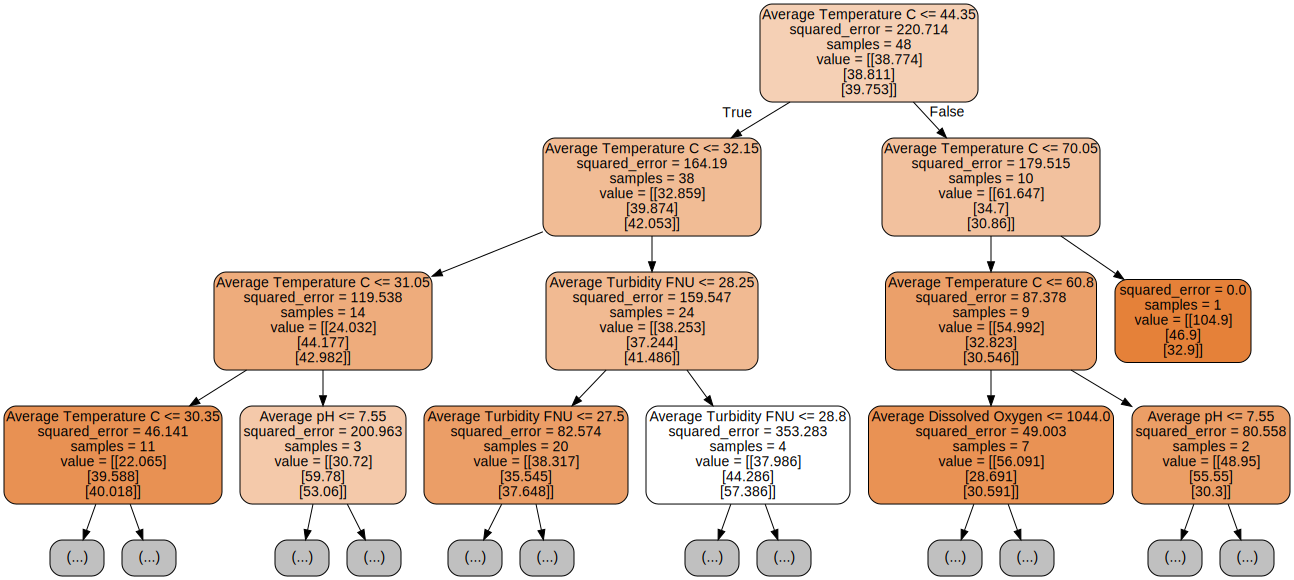

In [ ]:
# TODO: Change this value to view the other decision trees
tree_number = 1

# TODO: Change this value to change the depth of the decision tree
max_depth = 3

tree = model.estimators_[tree_number]

feature_names = ['Average Dissolved Oxygen', 'Average Temperature C',	'Average Turbidity FNU', 'Average pH', 'Average Specific Conductance μS/cm']

dot_data = export_graphviz(tree, feature_names=feature_names, filled=True, rounded=True, max_depth=max_depth)

graph = graphviz.Source(dot_data)
graph.render("water_tree")
graph

Code Block 6B

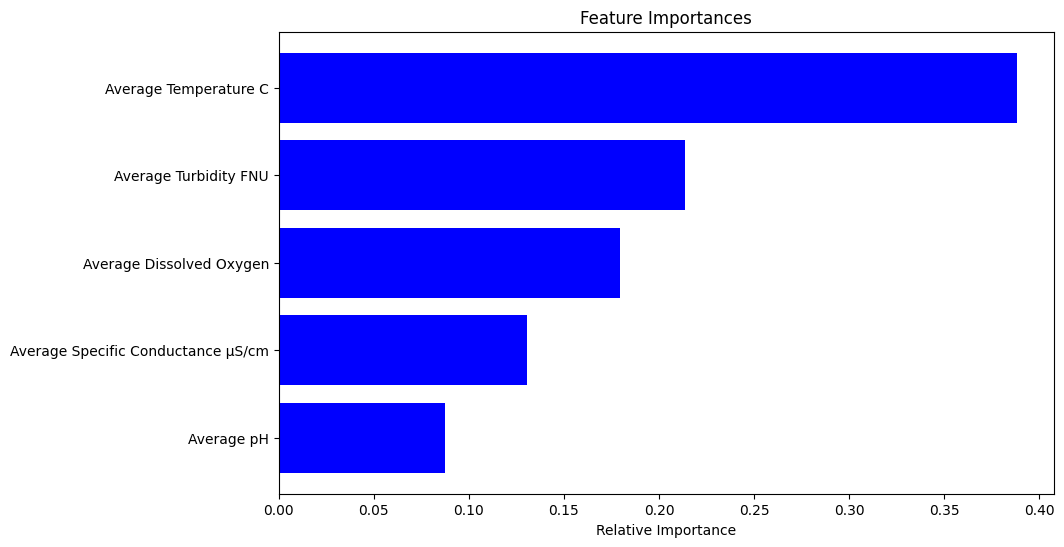

In [ ]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()